# Phishing URL detection

The Internet has become an essential part of our daily lives, but it also enables malicious actions, 
such as phishing, to be carried out anonymously. Phishers aim to trick their victims through social engineering 
tactics or by designing fake websites that closely resemble legitimate ones. Their goal is to steal sensitive 
information, like account IDs, usernames, and passwords, from individuals and organizations. While numerous 
techniques have been developed to identify phishing websites, phishers continually adapt their approaches to 
evade these detection systems. Machine learning has emerged as one of the most effective tools for identifying 
these malicious activities, as phishing attacks often share certain patterns that machine learning algorithms can 
detect.

# The steps demonstrated in this notebook are:

1- Loading and visualizing the data

2- Familiarizing with data & EDA

3- Splitting the data

4- Model Building & Training

5- Comparision of Model

6- Conclusion

# 1 - Loading and Visualizing the data

In [109]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [110]:
#Loading data into dataframe

data = pd.read_csv("phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


Our dataset consists of 30 features extracted from URLs, along with a classification label indicating whether 
each URL is a phishing attempt or not. The class label is assigned as follows: a value of 1 represents a phishing 
    URL, while a value of -1 indicates a legitimate (non-phishing) URL.

## Data Visualization

### Bar Graph for phishing URL

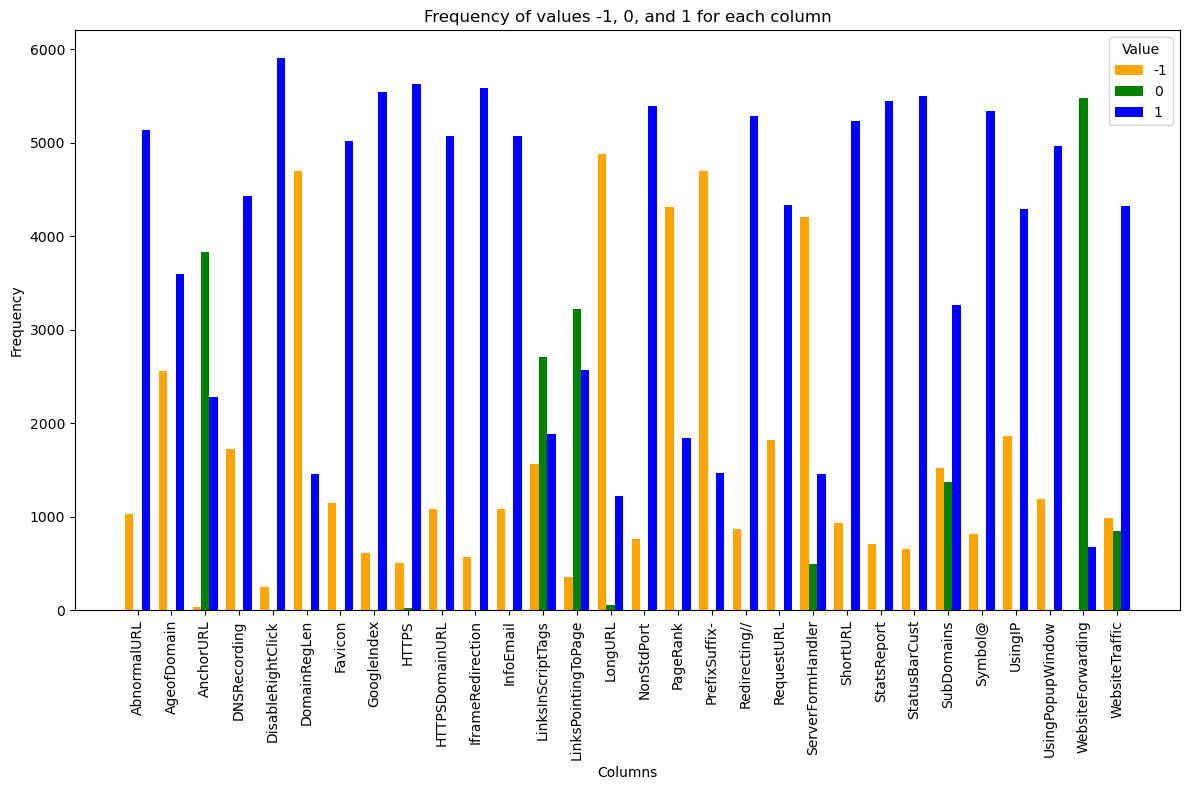

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
dt = pd.read_csv('cleanedData.csv')

# Filter rows where 'class' equals 1
dt = dt[dt['class'] == 1]

# Select the 30 columns (excluding 'class')
columns_to_plot = dt.columns.difference(['class'])

# Initialize dictionary to hold counts of -1, 0, and 1 for each column
value_counts = {col: dt[col].value_counts().reindex([-1, 0, 1], fill_value=0) for col in columns_to_plot}

# Convert dictionary to DataFrame for plotting
count_dt = pd.DataFrame(value_counts)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.25
index = np.arange(len(columns_to_plot))

# Plot each bar for -1, 0, 1 values with custom colors
colors = {-1: 'orange', 0: 'green', 1: 'blue'}  # Define colors for each value
for i, value in enumerate([-1, 0, 1]):
    ax.bar(index + i * bar_width, count_dt.loc[value], width=bar_width, 
           label=f'{value}', color=colors[value])

# Set labels and title
ax.set_xlabel('Columns')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of values -1, 0, and 1 for each column')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(columns_to_plot, rotation=90)
ax.legend(title='Value')

plt.tight_layout()
plt.show()


### Bar Graph for non-Phishing URL

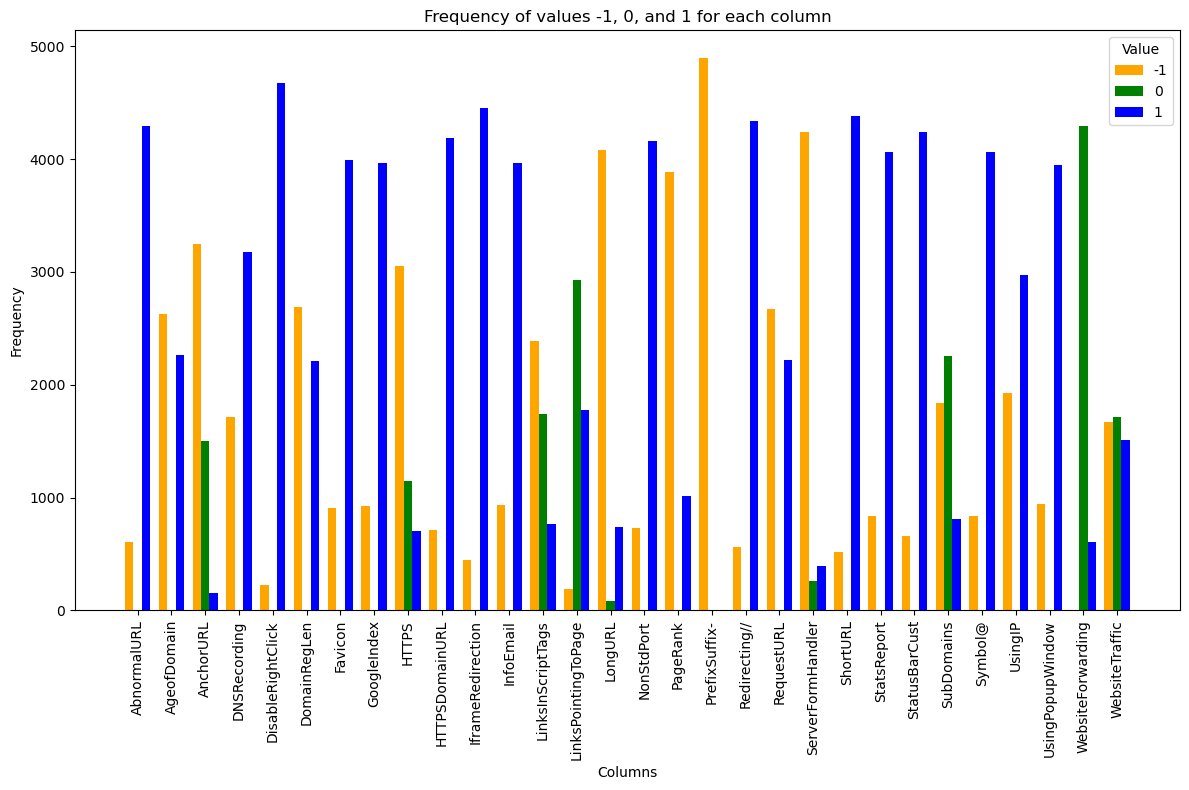

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
dt = pd.read_csv('cleanedData.csv')

# Filter rows where 'class' equals 1
dt = dt[dt['class'] == -1]

# Select the 30 columns (excluding 'class')
columns_to_plot = dt.columns.difference(['class'])

# Initialize dictionary to hold counts of -1, 0, and 1 for each column
value_counts = {col: dt[col].value_counts().reindex([-1, 0, 1], fill_value=0) for col in columns_to_plot}

# Convert dictionary to DataFrame for plotting
count_dt = pd.DataFrame(value_counts)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.25
index = np.arange(len(columns_to_plot))

# Plot each bar for -1, 0, 1 values with custom colors
colors = {-1: 'orange', 0: 'green', 1: 'blue'}  # Define colors for each value
for i, value in enumerate([-1, 0, 1]):
    ax.bar(index + i * bar_width, count_dt.loc[value], width=bar_width, 
           label=f'{value}', color=colors[value])

# Set labels and title
ax.set_xlabel('Columns')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of values -1, 0, and 1 for each column')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(columns_to_plot, rotation=90)
ax.legend(title='Value')

plt.tight_layout()
plt.show()


### Correlation Heatmap

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
#data = pd.read_csv('cleanedData.csv')
data = pd.read_csv('phishing.csv')

# Plotting the correlation heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


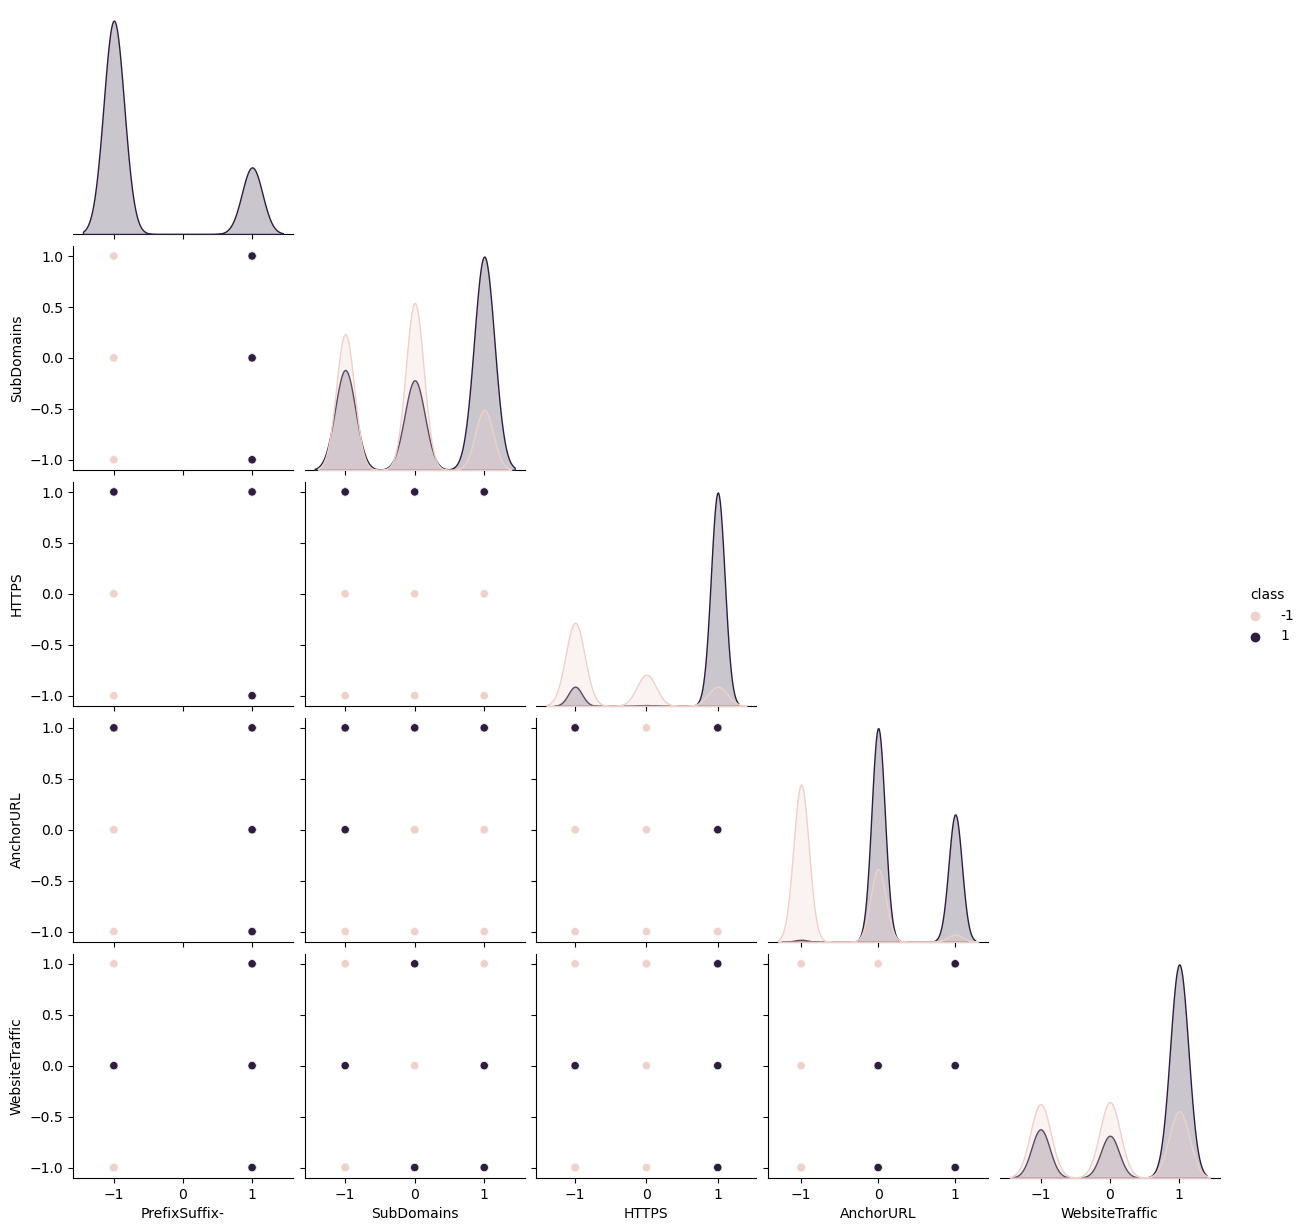

In [114]:
#pairplot for particular features

df = data[['PrefixSuffix-', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','class']]
sns.pairplot(data = df,hue="class",corner=True);


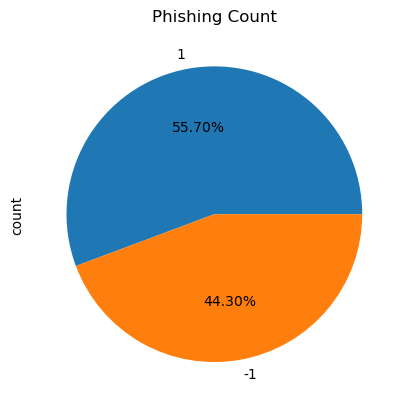

In [115]:
# Phishing Count in pie chart

data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

# 2- Familiarizing with data & EDA

In [116]:
# Load the CSV file, using the first column as the index
file_path = 'phishing.csv'  
df = pd.read_csv(file_path, index_col=0)

# Print each column header with an index
print("Column headers:")
for i, column in enumerate(df.columns, start=1):
    print(f"{i}. {column}")


Column headers:
1. UsingIP
2. LongURL
3. ShortURL
4. Symbol@
5. Redirecting//
6. PrefixSuffix-
7. SubDomains
8. HTTPS
9. DomainRegLen
10. Favicon
11. NonStdPort
12. HTTPSDomainURL
13. RequestURL
14. AnchorURL
15. LinksInScriptTags
16. ServerFormHandler
17. InfoEmail
18. AbnormalURL
19. WebsiteForwarding
20. StatusBarCust
21. DisableRightClick
22. UsingPopupWindow
23. IframeRedirection
24. AgeofDomain
25. DNSRecording
26. WebsiteTraffic
27. PageRank
28. GoogleIndex
29. LinksPointingToPage
30. StatsReport
31. class


In [117]:
#Shape of dataframe excluding index

data.shape

(11054, 32)

In [118]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [119]:
# nunique value in columns

data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [120]:
#droping index column

data = data.drop(['Index'],axis = 1)

In [121]:
#description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


# 3- Splitting the data

Splitting the data into 80-20

In [122]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["class"],axis =1)
y = data["class"]

In [123]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

# 4- Model Building & Training

Supervised machine learning is one of the most widely used and effective types of machine learning. It is employed when the objective is to predict a specific outcome or label based on a set of input features, using examples of feature-label pairs. A machine learning model is trained on these pairs, which constitute the training set, with the aim of making accurate predictions on new, unseen data.

Supervised learning problems can be broadly categorized into two types: classification and regression. In this case, our dataset pertains to a regression problem, as the task involves predicting the suicide rate, which is a continuous value or, in programming terms, a floating-point number.

The supervised machine learning models (regression) utilized to train this dataset in this notebook are as follows:

1. Logistic Regression
2. k-Nearest Neighbors 
3. Support Vector Clasifier
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boosting
8. Multilayer Perceptrons

              
  The metrics considered to evaluate the model performance are Accuracy & F1 score.

## 4.1 Logistic Regression
Logistic regression is a statistical method for predicting the outcome of a categorical dependent variable. Consequently, the target variable must assume a discrete or categorical value. Although logistic regression shares similarities with linear regression in terms of structure, the two are applied to distinct types of problems: linear regression addresses regression tasks, while logistic regression is specifically designed for classification problems.

## 4.2. K-Nearest Neighbors : Classifier

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

## 4.3. Support Vector Machine : Classifier

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future.

## 4.4. Naive Bayes : Classifier

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is mainly used in text, image classification that includes a high-dimensional training dataset. Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

## 4.5. Decision Trees : Classifier

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

## 4.6. Random Forest : Classifier

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

## 4.7.Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Boosting algorithms play a crucial role in dealing with bias variance trade-off.  Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both the aspects (bias & variance), and is considered to be more effective. 

## 4.8. Multi-layer Perceptron classifier

MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.


In [124]:
# Import required libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined (your features and target)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create holders to store model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

# Function to store results
def storeResults(model, a, b, c, d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    f1_score.append(round(b, 3))
    recall.append(round(c, 3))
    precision.append(round(d, 3))

# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Multilayer Perceptrons": MLPClassifier()
}

# Loop through models, train, predict, and evaluate
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Compute metrics
    acc_test = metrics.accuracy_score(y_test, y_test_pred)
    f1_test = metrics.f1_score(y_test, y_test_pred)
    recall_test = metrics.recall_score(y_test, y_test_pred)
    precision_test = metrics.precision_score(y_test, y_test_pred)
    
    # Print the metrics
    print(f"{model_name} : Accuracy on test data: {acc_test:.3f}")
    print(f"{model_name} : F1 Score on test data: {f1_test:.3f}")
    print(f"{model_name} : Recall on test data: {recall_test:.3f}")
    print(f"{model_name} : Precision on test data: {precision_test:.3f}")
    print()
    
    # Store the results
    storeResults(model_name, acc_test, f1_test, recall_test, precision_test)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    "ML Model": ML_Model,
    "Accuracy": accuracy,
    "F1 Score": f1_score,
    "Recall": recall,
    "Precision": precision
})

# Display the results
print(results_df)


Logistic Regression : Accuracy on test data: 0.934
Logistic Regression : F1 Score on test data: 0.941
Logistic Regression : Recall on test data: 0.953
Logistic Regression : Precision on test data: 0.930

k-Nearest Neighbors : Accuracy on test data: 0.941
k-Nearest Neighbors : F1 Score on test data: 0.948
k-Nearest Neighbors : Recall on test data: 0.953
k-Nearest Neighbors : Precision on test data: 0.942

Support Vector Classifier : Accuracy on test data: 0.951
Support Vector Classifier : F1 Score on test data: 0.957
Support Vector Classifier : Recall on test data: 0.973
Support Vector Classifier : Precision on test data: 0.941

Naive Bayes : Accuracy on test data: 0.605
Naive Bayes : F1 Score on test data: 0.454
Naive Bayes : Recall on test data: 0.294
Naive Bayes : Precision on test data: 0.995

Decision Tree : Accuracy on test data: 0.958
Decision Tree : F1 Score on test data: 0.962
Decision Tree : Recall on test data: 0.960
Decision Tree : Precision on test data: 0.964

Random Fores

### Graph of the results

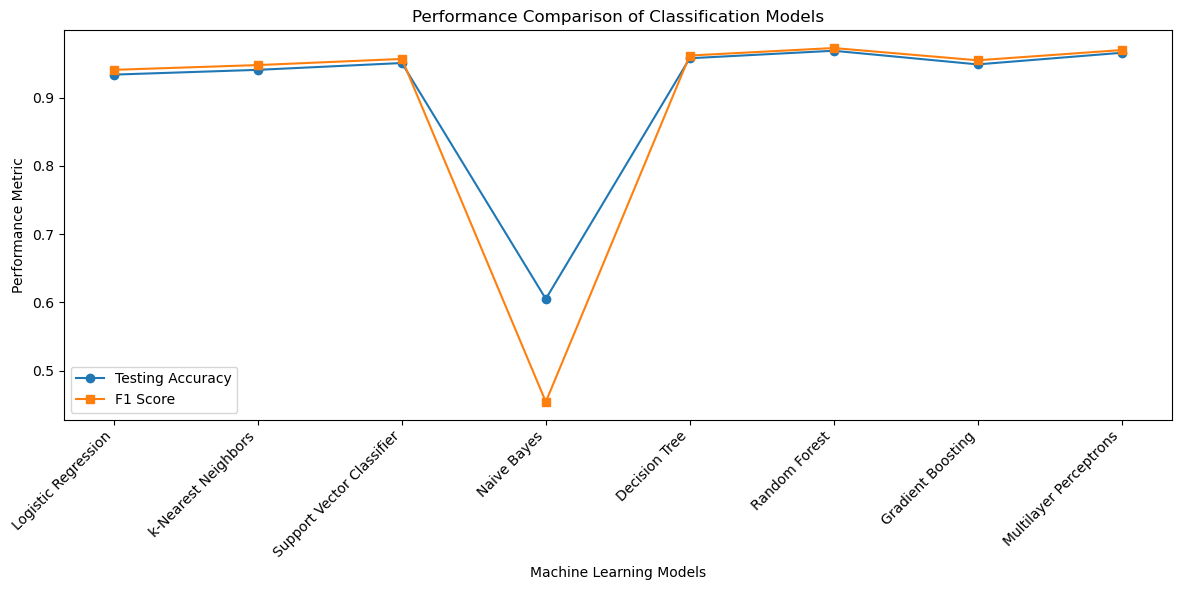

In [125]:
import matplotlib.pyplot as plt

# Assuming ML_Model, accuracy, and f1_score lists are already populated
plt.figure(figsize=(12, 6))

# Plotting accuracy
plt.plot(ML_Model, accuracy, label="Testing Accuracy", marker='o')

# Plotting F1 score
plt.plot(ML_Model, f1_score, label="F1 Score", marker='s')

# Adding labels, legend, and title
plt.ylabel("Performance Metric")
plt.xlabel("Machine Learning Models")
plt.title("Performance Comparison of Classification Models")
plt.xticks(rotation=45, ha="right")
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


# Comparision of the model

In [126]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [127]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.934,0.941,0.953,0.930
1,k-Nearest Neighbors,0.941,0.948,0.953,0.942
2,Support Vector Classifier,0.951,0.957,0.973,0.941
3,Naive Bayes,0.605,0.454,0.294,0.995
4,Decision Tree,0.958,0.962,0.960,0.964
5,Random Forest,0.969,0.973,0.978,0.967
6,Gradient Boosting,0.949,0.955,0.962,0.948
7,Multilayer Perceptrons,0.966,0.970,0.969,0.970


In [128]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [129]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Random Forest,0.969,0.973,0.978,0.967
1,Multilayer Perceptrons,0.966,0.970,0.969,0.970
2,Decision Tree,0.958,0.962,0.960,0.964
3,Support Vector Classifier,0.951,0.957,0.973,0.941
4,Gradient Boosting,0.949,0.955,0.962,0.948
5,k-Nearest Neighbors,0.941,0.948,0.953,0.942
6,Logistic Regression,0.934,0.941,0.953,0.930
7,Naive Bayes,0.605,0.454,0.294,0.995


## Storing the best model

In [130]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [131]:
import pickle

# dump information to that file
pickle.dump(gbc, open('pickle/Phishing_URL_model.pkl', 'wb'))


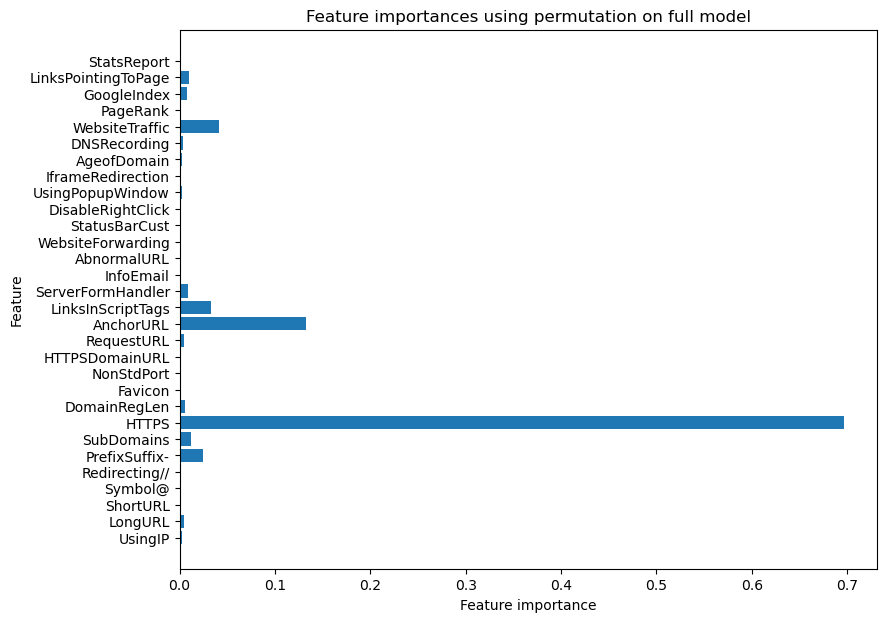

In [132]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

# Calling the model

In [133]:
# import pickle

# # dump information to that file
# pickle.dump(gbc, open('pickle/Phishing_URL_model.pkl', 'wb'))
# # fit the model 
# gbc.fit(X_train,y_train)

In [134]:



import ipaddress
import re
import urllib.request
from bs4 import BeautifulSoup
import socket
import requests
from googlesearch import search
import whois
from datetime import date
from urllib.parse import urlparse

class FeatureExtraction:
    def __init__(self, url):
        self.features = []
        self.url = url
        self.domain = ""
        self.whois_response = ""
        self.urlparse = ""
        self.response = ""
        self.soup = ""

        try:
            self.response = requests.get(url)
            self.soup = BeautifulSoup(self.response.text, 'html.parser')
        except Exception as e:
            
            pass

        try:
            self.urlparse = urlparse(url)
            self.domain = self.urlparse.netloc
        except Exception as e:
            
            pass

        try:
            self.whois_response = whois.whois(self.domain)
        except Exception as e:
            
            pass

        # Extract features using respective methods
        self.features.append(self.UsingIp())
        self.features.append(self.longUrl())
        self.features.append(self.shortUrl())
        self.features.append(self.symbol())
        self.features.append(self.redirecting())
        self.features.append(self.prefixSuffix())
        self.features.append(self.SubDomains())
        self.features.append(self.Hppts())
        self.features.append(self.DomainRegLen())
        self.features.append(self.Favicon())
        self.features.append(self.NonStdPort())
        self.features.append(self.HTTPSDomainURL())
        self.features.append(self.RequestURL())
        self.features.append(self.AnchorURL())
        self.features.append(self.LinksInScriptTags())
        self.features.append(self.ServerFormHandler())
        self.features.append(self.InfoEmail())
        self.features.append(self.AbnormalURL())
        self.features.append(self.WebsiteForwarding())
        self.features.append(self.StatusBarCust())
        self.features.append(self.DisableRightClick())
        self.features.append(self.UsingPopupWindow())
        self.features.append(self.IframeRedirection())
        self.features.append(self.AgeofDomain())
        self.features.append(self.DNSRecording())
        self.features.append(self.WebsiteTraffic())
        self.features.append(self.PageRank())
        self.features.append(self.GoogleIndex())
        self.features.append(self.LinksPointingToPage())
        self.features.append(self.StatsReport())

# # Extract features using respective methods
#         self.extract_features()

#     def extract_features(self):
#         self.features["UsingIp"] = self.UsingIp()
#         self.features["longUrl"] = self.longUrl()
#         self.features["shortUrl"] = self.shortUrl()
#         self.features["symbol"] = self.symbol()
#         self.features["redirecting"] = self.redirecting()
#         self.features["prefixSuffix"] = self.prefixSuffix()
#         self.features["SubDomains"] = self.SubDomains()
#         self.features["Hppts"] = self.Hppts()
#         self.features["DomainRegLen"] = self.DomainRegLen()
#         self.features["Favicon"] = self.Favicon()
#         self.features["NonStdPort"] = self.NonStdPort()
#         self.features["HTTPSDomainURL"] = self.HTTPSDomainURL()
#         self.features["RequestURL"] = self.RequestURL()
#         self.features["AnchorURL"] = self.AnchorURL()
#         self.features["LinksInScriptTags"] = self.LinksInScriptTags()
#         self.features["ServerFormHandler"] = self.ServerFormHandler()
#         self.features["InfoEmail"] = self.InfoEmail()
#         self.features["AbnormalURL"] = self.AbnormalURL()
#         self.features["WebsiteForwarding"] = self.WebsiteForwarding()
#         self.features["StatusBarCust"] = self.StatusBarCust()
#         self.features["DisableRightClick"] = self.DisableRightClick()
#         self.features["UsingPopupWindow"] = self.UsingPopupWindow()
#         self.features["IframeRedirection"] = self.IframeRedirection()
#         self.features["AgeofDomain"] = self.AgeofDomain()
#         self.features["DNSRecording"] = self.DNSRecording()
#         self.features["WebsiteTraffic"] = self.WebsiteTraffic()
#         self.features["PageRank"] = self.PageRank()
#         self.features["GoogleIndex"] = self.GoogleIndex()
#         self.features["LinksPointingToPage"] = self.LinksPointingToPage()
#         self.features["StatsReport"] = self.StatsReport()

    # 1. UsingIp
    def UsingIp(self):
        try:
            ipaddress.ip_address(self.url)
            return -1
        except Exception as e:
            
            return 1

    # 2. longUrl
    def longUrl(self):
        if len(self.url) < 54:
            return 1
        elif len(self.url) >= 54 and len(self.url) <= 75:
            return 0
        return -1

    # 3. shortUrl
    def shortUrl(self):
        match = re.search(
            'bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
            'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
            'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
            'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
            'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
            'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
            'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|tr\.im|link\.zip\.net',
            self.url)
        if match:
            return -1
        return 1

    # 4. Symbol@
    def symbol(self):
        if re.findall("@", self.url):
            return -1
        return 1

    # 5. Redirecting //
    def redirecting(self):
        if self.url.rfind('//') > 6:
            return -1
        return 1

    # 6. prefixSuffix
    def prefixSuffix(self):
        try:
            match = re.findall('-', self.domain)
            if match:
                return -1
            return 1
        except Exception as e:
            
            return -1

    # 7. SubDomains
    def SubDomains(self):
        dot_count = len(re.findall("\.", self.url))
        if dot_count == 1:
            return 1
        elif dot_count == 2:
            return 0
        return -1

    # 8. HTTPS
    def Hppts(self):
        try:
            https = self.urlparse.scheme
            if 'https' in https:
                return 1
            return -1
        except Exception as e:
            
            return 1

    # 9. DomainRegLen
    def DomainRegLen(self):
        try:
            expiration_date = self.whois_response.expiration_date
            creation_date = self.whois_response.creation_date
            if isinstance(expiration_date, list):
                expiration_date = expiration_date[0]
            if isinstance(creation_date, list):
                creation_date = creation_date[0]
            age = (expiration_date.year - creation_date.year) * 12 + (expiration_date.month - creation_date.month)
            if age >= 12:
                return 1
            return -1
        except Exception as e:
            
            return -1

    # 10. Favicon
    def Favicon(self):
        try:
            for head in self.soup.find_all('head'):
                for head.link in self.soup.find_all('link', href=True):
                    dots = [x.start(0) for x in re.finditer('\.', head.link['href'])]
                    if self.url in head.link['href'] or len(dots) == 1 or self.domain in head.link['href']:
                        return 1
            return -1
        except Exception as e:
            
            return -1

    # 11. NonStdPort
    def NonStdPort(self):
        try:
            port = self.domain.split(":")
            if len(port) > 1:
                return -1
            return 1
        except Exception as e:
            
            return -1

    # 12. HTTPSDomainURL
    def HTTPSDomainURL(self):
        try:
            if 'https' in self.domain:
                return -1
            return 1
        except Exception as e:
            
            return -1

    # 13. RequestURL
    def RequestURL(self):
        try:
            i, success = 0, 0
            for img in self.soup.find_all('img', src=True):
                dots = [x.start(0) for x in re.finditer('\.', img['src'])]
                if self.url in img['src'] or self.domain in img['src'] or len(dots) == 1:
                    success += 1
                i += 1
            # Check additional tags similarly (audio, embed, iframe)
            try:
                percentage = success / float(i) * 100
                if percentage < 22.0:
                    return 1
                elif 22.0 <= percentage < 61.0:
                    return 0
                else:
                    return -1
            except Exception as e:
                
                return 0
        except Exception as e:
            
            return -1

    # 14. AnchorURL
    def AnchorURL(self):
        try:
            i, unsafe = 0, 0
            for a in self.soup.find_all('a', href=True):
                if "#" in a['href'] or "javascript" in a['href'].lower() or "mailto" in a['href'].lower() or not (
                        self.url in a['href'] or self.domain in a['href']):
                    unsafe += 1
                i += 1
            try:
                percentage = unsafe / float(i) * 100
                if percentage < 31.0:
                    return 1
                elif 31.0 <= percentage < 67.0:
                    return 0
                else:
                    return -1
            except Exception as e:
                
                return -1
        except Exception as e:
            
            return -1

    # 15. LinksInScriptTags
    def LinksInScriptTags(self):
        try:
            i, success = 0, 0
            for link in self.soup.find_all('link', href=True):
                dots = [x.start(0) for x in re.finditer('\.', link['href'])]
                if self.url in link['href'] or self.domain in link['href'] or len(dots) == 1:
                    success += 1
                i += 1
            for script in self.soup.find_all('script', src=True):
                dots = [x.start(0) for x in re.finditer('\.', script['src'])]
                if self.url in script['src'] or self.domain in script['src'] or len(dots) == 1:
                    success += 1
                i += 1
            try:
                percentage = success / float(i) * 100
                if percentage < 17.0:
                    return 1
                elif 17.0 <= percentage < 81.0:
                    return 0
                else:
                    return -1
            except Exception as e:
                
                return 0
        except Exception as e:
            
            return -1

    # 16. ServerFormHandler
    def ServerFormHandler(self):
        try:
            if len(self.soup.find_all('form', action=True)) == 0:
                return 1
            else:
                for form in self.soup.find_all('form', action=True):
                    if form['action'] == "" or form['action'] == "about:blank":
                        return -1
                    elif self.url not in form['action'] and self.domain not in form['action']:
                        return 0
                    else:
                        return 1
        except Exception as e:
            
            return -1

    # 17. InfoEmail
    def InfoEmail(self):
        try:
            if re.findall(r"[mail\(\)|mailto:?]", self.soup):
                return -1
            return 1
        except Exception as e:
            
            return -1

    # 18. AbnormalURL
    def AbnormalURL(self):
        try:
            if self.response.text == self.whois_response:
                return 1
            else:
                return -1
        except Exception as e:
            
            return -1

    # 19. WebsiteForwarding
    def WebsiteForwarding(self):
        try:
            if len(self.response.history) <= 1:
                return 1
            elif len(self.response.history) <= 4:
                return 0
            else:
                return -1
        except Exception as e:
            
            return -1

    # 20. StatusBarCust
    def StatusBarCust(self):
        try:
            if re.findall("<script>.+onmouseover.+</script>", self.response.text):
                return 1
            else:
                return -1
        except Exception as e:
            
            return -1

    # 21. DisableRightClick
    def DisableRightClick(self):
        try:
            if re.findall(r"event.button ?== ?2", self.response.text):
                return 1
            else:
                return -1
        except Exception as e:
            
            return -1

    # 22. UsingPopupWindow
    def UsingPopupWindow(self):
        try:
            if re.findall(r"alert\(", self.response.text):
                return 1
            else:
                return -1
        except Exception as e:
            
            return -1

    # 23. IframeRedirection
    def IframeRedirection(self):
        try:
            if re.findall(r"[<iframe>|<frameBorder>]", self.response.text):
                return 1
            else:
                return -1
        except Exception as e:
            
            return -1

    # 24. AgeofDomain
    def AgeofDomain(self):
        try:
            creation_date = self.whois_response.creation_date
            if isinstance(creation_date, list):
                creation_date = creation_date[0]
            today = date.today()
            age = (today.year - creation_date.year) * 12 + (today.month - creation_date.month)
            if age >= 6:
                return 1
            return -1
        except Exception as e:
            
            return -1

    # 25. DNSRecording
    def DNSRecording(self):
        try:
            creation_date = self.whois_response.creation_date
            if isinstance(creation_date, list):
                creation_date = creation_date[0]
            today = date.today()
            age = (today.year - creation_date.year) * 12 + (today.month - creation_date.month)
            if age >= 6:
                return 1
            return -1
        except Exception as e:
            
            return -1

    # 26. WebsiteTraffic
    def WebsiteTraffic(self):
        try:
            rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + self.url).read(), "xml").find("REACH")['RANK']
            if int(rank) < 100000:
                return 1
            return 0
        except Exception as e:
            
            return -1

    # 27. PageRank
    def PageRank(self):
        try:
            prank_checker_response = requests.post("https://www.checkpagerank.net/index.php", {"name": self.domain})
            global_rank = int(re.findall(r"Global Rank: ([0-9]+)", prank_checker_response.text)[0])
            if global_rank > 0 and global_rank < 100000:
                return 1
            return -1
        except Exception as e:
            
            return -1

    # 28. GoogleIndex
    def GoogleIndex(self):
        try:
            site = search(self.url, 5)
            if site:
                return 1
            else:
                return -1
        except Exception as e:
            
            return 1

    # 29. LinksPointingToPage
    def LinksPointingToPage(self):
        try:
            number_of_links = len(re.findall(r"<a href=", self.response.text))
            if number_of_links == 0:
                return 1
            elif number_of_links <= 2:
                return 0
            else:
                return -1
        except Exception as e:
            
            return -1

    # 30. StatsReport
    def StatsReport(self):
        try:
            url_match = re.search(
                'at\.ua|usa\.cc|baltazarpresentes\.com\.br|pe\.hu|esy\.es|hol\.es|sweddy\.com|myjino\.ru|96\.lt|ow\.ly', self.url)
            ip_address = socket.gethostbyname(self.domain)
            ip_match = re.search('146\.112\.61\.108|213\.174\.157\.151|121\.50\.168\.88|192\.185\.217\.116|78\.46\.211\.158|181\.174\.165\.13|46\.242\.145\.103|121\.50\.168\.40|83\.125\.22\.219|46\.242\.145\.98|'
                                '107\.151\.148\.44|107\.151\.148\.107|64\.70\.19\.203|199\.184\.144\.27|107\.151\.148\.108|107\.151\.148\.109|119\.28\.52\.61|54\.83\.43\.69|52\.69\.166\.231|216\.58\.192\.225|'
                                '118\.184\.25\.86|67\.208\.74\.71|23\.253\.126\.58|104\.239\.157\.210|175\.126\.123\.219|141\.8\.224\.221|10\.10\.10\.10|43\.229\.108\.32|103\.232\.215\.140|69\.172\.201\.153|'
                                '216\.218\.185\.162|54\.225\.104\.146|103\.243\.24\.98|199\.59\.243\.120|31\.170\.160\.61|213\.19\.128\.77|62\.113\.226\.131|208\.100\.26\.234|195\.16\.127\.102|195\.16\.127\.157|'
                                '34\.196\.13\.28|103\.224\.212\.222|172\.217\.4\.225|54\.72\.9\.51|192\.64\.147\.141|198\.200\.56\.183|23\.253\.164\.103|52\.48\.191\.26|52\.214\.197\.72|87\.98\.255\.18|209\.99\.17\.27|'
                                '216\.38\.62\.18|104\.130\.124\.96|47\.89\.58\.141|78\.46\.211\.158|54\.86\.225\.156|54\.82\.156\.19|37\.157\.192\.102|204\.11\.56\.48|110\.34\.231\.42', ip_address)
            if url_match:
                return -1
            elif ip_match:
                return -1
            return 1
        except Exception as e:
            
            return 1

    def getFeaturesList(self):
        return self.features



In [141]:
# import pickle
# import numpy as np
# import pandas as pd
# import requests

# # Load the trained model
# with open("pickle/Phishing_URL_model.pkl", "rb") as file:
#     gbc = pickle.load(file)

# # Input URL to extract features
# url = input("Enter the URL to check: ")

# # Extract features using the FeatureExtraction class
# feature_extractor = FeatureExtraction(url)
# features = np.array(feature_extractor.getFeaturesList()).reshape(1, -1)

# # Predict if the URL is phishing or not
# y_pred = gbc.predict(features)[0]

# result = gbc.predict_proba(features)
# #print(result)
# #print(features,len(features[0]))
# y_pro_phishing = result[0,0] 
# y_pro_non_phishing = result[0,1]
# # Probability of phishing and non-phishing
# # y_pro_phishing = gbc.predict_proba(features)[0, 0]
# # y_pro_non_phishing = gbc.predict_proba(features)[0, 1]

# # List of feature names (corresponding to the order of feature extraction methods)
# feature_names = [
#     "Using IP", "Long URL", "Short URL", "Symbol @", "Redirecting //",
#     "Prefix Suffix", "Sub Domains", "HTTPS", "Domain Registration Length",
#     "Favicon", "Non-Standard Port", "HTTPS Domain URL", "Request URL",
#     "Anchor URL", "Links in Script Tags", "Server Form Handler",
#     "Info Email", "Abnormal URL", "Website Forwarding", "Status Bar Customization","Disable Right CLick",
#     "Using Popup Window", "Iframe Redirection",
#     "Age of Domain", "DNS Recording", "Website Traffic", "Page Rank",
#     "Google Index", "Links Pointing to Page", "Stats Report"
# ]
# #         # Extract features using respective methods
# #         self.features.append(self.UsingIp())
# #         self.features.append(self.longUrl())
# #         self.features.append(self.shortUrl())
# #         self.features.append(self.symbol())
# #         self.features.append(self.redirecting())
# #         self.features.append(self.prefixSuffix())
# #         self.features.append(self.SubDomains())
# #         self.features.append(self.Hppts())
# #         self.features.append(self.DomainRegLen())
# #         self.features.append(self.Favicon())
# #         self.features.append(self.NonStdPort())
# #         self.features.append(self.HTTPSDomainURL())
# #         self.features.append(self.RequestURL())
# #         self.features.append(self.AnchorURL())
# #         self.features.append(self.LinksInScriptTags())
# #         self.features.append(self.ServerFormHandler())
# #         self.features.append(self.InfoEmail())
# #         self.features.append(self.AbnormalURL())
# #         self.features.append(self.WebsiteForwarding())
# #         self.features.append(self.StatusBarCust())
# #         self.features.append(self.DisableRightClick())
# #         self.features.append(self.UsingPopupWindow())
# #         self.features.append(self.IframeRedirection())
# #         self.features.append(self.AgeofDomain())
# #         self.features.append(self.DNSRecording())
# #         self.features.append(self.WebsiteTraffic())
# #         self.features.append(self.PageRank())
# #         self.features.append(self.GoogleIndex())
# #         self.features.append(self.LinksPointingToPage())
# #         self.features.append(self.StatsReport())

# # Display results
# if y_pred == 1:
#     print(f"It is {y_pro_non_phishing * 100:.2f}% safe to go to the website.")
# else:
#     print(f"It is {y_pro_phishing * 100:.2f}% likely to be a risky site.")

# print("1 = safety, 0 = somewhat accepted, -1 = Highly risky")
# # Print extracted features with their values
# for name, value in zip(feature_names, features[0]):
#     print(f"{name}: {value}")

    
# # https://phishtank.org/

In [139]:
import os
import pickle
import numpy as np
import requests
from pathlib import Path
from sentiment_analysis import load_sentiment_analyzer, analyze_sentiment
from Scraper_EntityRecog_SpellChecker import scrape_website, OrganizationRecognizer, check_spelling, extract_valid_words
#from FeatureExtraction import FeatureExtraction  # Assuming FeatureExtraction is a separate class you defined
from sklearn.ensemble import GradientBoostingClassifier
import pickle

# Assuming X_train and y_train are your training data and labels
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train) 

# List of feature names (corresponding to the order of feature extraction methods)
feature_names = [
    "Using IP", "Long URL", "Short URL", "Symbol @", "Redirecting //",
    "Prefix Suffix", "Sub Domains", "HTTPS", "Domain Registration Length",
    "Favicon", "Non-Standard Port", "HTTPS Domain URL", "Request URL",
    "Anchor URL", "Links in Script Tags", "Server Form Handler",
    "Info Email", "Abnormal URL", "Website Forwarding", "Status Bar Customization", "Disable Right CLick",
    "Using Popup Window", "Iframe Redirection",
    "Age of Domain", "DNS Recording", "Website Traffic", "Page Rank",
    "Google Index", "Links Pointing to Page", "Stats Report"
]

# Load phishing URL model
def load_phishing_model():
    """Load the trained phishing URL detection model."""
    with open("pickle/Phishing_URL_model.pkl", "rb") as file:
        gbc = pickle.load(file)
        # fit the model 
    
    return gbc

# Function to get sentiment analysis result
def get_sentiment_analysis(text):
    """Get the sentiment analysis result."""
    sentiment_analyzer = load_sentiment_analyzer()
    if sentiment_analyzer is not None:
        sentiment_results = analyze_sentiment(sentiment_analyzer, text)
        if sentiment_results:
            return sentiment_results[0]['score']
    return 0.0  # Return neutral if not able to analyze

# Function to get organization recognition result
def get_organization_recognition(text):
    """Get the organization recognition result."""
    recognizer = OrganizationRecognizer()
    org_entities = recognizer.analyze_text(text)
    if org_entities:
        avg_confidence = sum(org_entities) / len(org_entities)
        return avg_confidence
    return 0.0  # No organizations found

# Function to get spelling checker result
def get_spelling_checker(text):
    """Get the spelling checker result."""
    valid_words = extract_valid_words(text)
    corrections, misspelled_count = check_spelling(valid_words)
    total_words = len(valid_words)
    correct_words_count = total_words - misspelled_count
    accuracy_percentage = (correct_words_count / total_words) * 100 if total_words > 0 else 0
    return accuracy_percentage

# Function to process the URL and perform all analyses
def process_url(url, save_folder):
    """Process the URL, scrape content, and run all analyses."""
    output_file = os.path.join(save_folder, "website.txt")
    
    # Scrape the website content and save to text file
    scrape_website(url, save_folder)
    
    # If website scraping fails or the file is empty, reset the text file
    if not os.path.getsize(output_file):
        with open(output_file, 'w', encoding='utf-8') as f:
            f.write("")  # Clear the content
    
    # Read the scraped website content
    with open(output_file, 'r', encoding='utf-8') as file:
        text = file.read()
    
    # Perform Sentiment Analysis
    sentiment_score = get_sentiment_analysis(text)
    
    # Perform Organization Recognition
    org_recognition_score = get_organization_recognition(text)
    
    # Perform Spelling Check
    spelling_accuracy = get_spelling_checker(text)
    
    # Predict Phishing URL using the model
    phishing_model = load_phishing_model()
    feature_extractor = FeatureExtraction(url)
    features = np.array(feature_extractor.getFeaturesList()).reshape(1, -1)
    y_pred = phishing_model.predict(features)[0]
    result = phishing_model.predict_proba(features)
    y_pro_phishing = result[0, 0]
    y_pro_non_phishing = result[0, 1]
    
    # Calculate Final Score based on weighted criteria
    final_score = (
        0.3 * y_pro_non_phishing +  # 30% phishing score
        0.3 * sentiment_score +  # 30% sentiment analysis score
        0.2 * org_recognition_score +  # 20% organization recognition score
        0.2 * spelling_accuracy / 100  # 20% spelling accuracy score (percentage)
    )
    
    # Display results
    if y_pred == 1:
        print(f"It is {y_pro_non_phishing * 100:.2f}% safe to go to the website.")
    else:
        print(f"It is {y_pro_phishing * 100:.2f}% likely to be a risky site.")
    
    print(f"Sentiment Analysis Score: {sentiment_score:.2f}")
    print(f"Organization Recognition Score: {org_recognition_score:.2f}")
    print(f"Spelling Checker Accuracy: {spelling_accuracy:.2f}%")
    
    print(f"\nFinal Weighted Score: {final_score:.2f}")
    
    # Print extracted features with their values
    print("\nExtracted Features and their Values:")
    for name, value in zip(feature_names, features[0]):
        print(f"{name}: {value}")

# Main function to call the process_url function
if __name__ == "__main__":
    # Input URL to be checked
    url_input = input("Enter the URL to analyze: ").strip()
    save_folder = "/Users/doctorranjan/Desktop/NFSU/DS_AI_project/DS_AI_Phishing_URL_Detetction"
    
    # Ensure the URL is accessible for scraping
    try:
        response = requests.get(url_input, timeout=10)
        if response.status_code == 200:
            process_url(url_input, save_folder)
        else:
            print(f"Unable to fetch the URL. Status code: {response.status_code}")
    except requests.exceptions.RequestException:
        print("Error: Unable to fetch the URL.")


Enter the URL to analyze: https://goa.nfsu.ac.in/
Current working directory: /Users/doctorranjan/Desktop/NFSU/DS_AI_project/DS_AI_Phishing_URL_Detetction
Created/verified directory: /Users/doctorranjan/Desktop/NFSU/DS_AI_project/DS_AI_Phishing_URL_Detetction
Fetching content from: https://goa.nfsu.ac.in/

File saved successfully!
File location: /Users/doctorranjan/Desktop/NFSU/DS_AI_project/DS_AI_Phishing_URL_Detetction/website.txt
File size: 1.18 KB
File verification successful - file exists and is accessible

To open the folder in Finder/File Explorer, run:
open '/Users/doctorranjan/Desktop/NFSU/DS_AI_project/DS_AI_Phishing_URL_Detetction'


Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Processing sentences: 100%|███████████████████████| 5/5 [00:02<00:00,  1.72it/s]


It is 99.92% safe to go to the website.
Sentiment Analysis Score: 0.88
Organization Recognition Score: 0.87
Spelling Checker Accuracy: 93.37%

Final Weighted Score: 0.92

Extracted Features and their Values:
Using IP: 1
Long URL: 1
Short URL: 1
Symbol @: 1
Redirecting //: 1
Prefix Suffix: 1
Sub Domains: -1
HTTPS: 1
Domain Registration Length: 1
Favicon: 1
Non-Standard Port: 1
HTTPS Domain URL: 1
Request URL: -1
Anchor URL: -1
Links in Script Tags: 0
Server Form Handler: 1
Info Email: -1
Abnormal URL: -1
Website Forwarding: 1
Status Bar Customization: -1
Disable Right CLick: -1
Using Popup Window: -1
Iframe Redirection: 1
Age of Domain: 1
DNS Recording: 1
Website Traffic: -1
Page Rank: -1
Google Index: 1
Links Pointing to Page: -1
Stats Report: 1


In [145]:
import os
import pickle
import numpy as np
import requests
from pathlib import Path
from sentiment_analysis import load_sentiment_analyzer, analyze_sentiment
from Scraper_EntityRecog_SpellChecker import scrape_website, OrganizationRecognizer, check_spelling, extract_valid_words
from sklearn.ensemble import GradientBoostingClassifier
import pickle

# Load phishing URL model
def load_phishing_model():
    """Load the trained phishing URL detection model."""
    with open("pickle/Phishing_URL_model.pkl", "rb") as file:
        gbc = pickle.load(file)
    return gbc

# Function to process the URL and perform all analyses
def process_url(url, save_folder):
    """Process the URL, scrape content, and run all analyses."""
    output_file = os.path.join(save_folder, "website.txt")
    
    # Scrape the website content and save to text file
    scrape_website(url, save_folder)
    
    # If website scraping fails or the file is empty, reset the text file
    if not os.path.getsize(output_file):
        with open(output_file, 'w', encoding='utf-8') as f:
            f.write("")  # Clear the content
    
    # Read the scraped website content
    with open(output_file, 'r', encoding='utf-8') as file:
        text = file.read()
    
    # Perform Sentiment Analysis
    sentiment_score = get_sentiment_analysis(text)
    
    # Perform Organization Recognition
    org_recognition_score = get_organization_recognition(text)
    
    # Perform Spelling Check
    spelling_accuracy = get_spelling_checker(text)
    
    # Predict Phishing URL using the model
    phishing_model = load_phishing_model()
    feature_extractor = FeatureExtraction(url)
    features = np.array(feature_extractor.getFeaturesList()).reshape(1, -1)
    y_pred = phishing_model.predict(features)[0]
    result = phishing_model.predict_proba(features)
    y_pro_phishing = result[0, 0]
    y_pro_non_phishing = result[0, 1]
    
    # Calculate Final Score based on weighted criteria
    final_score = (
        0.3 * y_pro_non_phishing +  # 30% phishing score
        0.3 * sentiment_score +  # 30% sentiment analysis score
        0.2 * org_recognition_score +  # 20% organization recognition score
        0.2 * spelling_accuracy / 100  # 20% spelling accuracy score (percentage)
    )
    #print("URL can be fraud score: " , y_pro_phishing)
    print("sentiment Analysis Score: ",sentiment_score)
    print("Org Recognition score: ",org_recognition_score)
    print("Spelling accuracy score: ",spelling_accuracy)
    
    # Final decision output based on the model's prediction
    if y_pred == 1:
        print(f"Url Detection: It is {y_pro_non_phishing * 100:.2f}% safe to go to the website.")
    else:
        print(f"Url Detection: It is {y_pro_phishing * 100:.2f}% likely to be a risky site.")
    
    print("\n")
    # Print the final weighted score
    print(f"Final Weighted Score: {final_score:.2f}")
    
# Main function to call the process_url function
if __name__ == "__main__":
    # Input URL to be checked
    url_input = input("Enter the URL to analyze: ").strip()
    save_folder = "/Users/doctorranjan/Desktop/NFSU/DS_AI_project/DS_AI_Phishing_URL_Detetction"
    
    # Ensure the URL is accessible for scraping
    try:
        response = requests.get(url_input, timeout=10)
        if response.status_code == 200:
            process_url(url_input, save_folder)
        else:
            print(f"Unable to fetch the URL. Status code: {response.status_code}")
    except requests.exceptions.RequestException:
        print("Error: Unable to fetch the URL.")


Enter the URL to analyze: https://goa.nfsu.ac.in/
Current working directory: /Users/doctorranjan/Desktop/NFSU/DS_AI_project/DS_AI_Phishing_URL_Detetction
Created/verified directory: /Users/doctorranjan/Desktop/NFSU/DS_AI_project/DS_AI_Phishing_URL_Detetction
Fetching content from: https://goa.nfsu.ac.in/

File saved successfully!
File location: /Users/doctorranjan/Desktop/NFSU/DS_AI_project/DS_AI_Phishing_URL_Detetction/website.txt
File size: 1.18 KB
File verification successful - file exists and is accessible

To open the folder in Finder/File Explorer, run:
open '/Users/doctorranjan/Desktop/NFSU/DS_AI_project/DS_AI_Phishing_URL_Detetction'


Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Processing sentences: 100%|███████████████████████| 5/5 [00:01<00:00,  4.18it/s]


sentiment Analysis Score:  0.8796056509017944
Org Recognition score:  0.8673057595888773
Spelling accuracy score:  93.37016574585635
Url Detection: It is 99.92% safe to go to the website.


Final Weighted Score: 0.92


In [147]:
import os
import pickle
import numpy as np
import requests
from pathlib import Path
from sentiment_analysis import load_sentiment_analyzer, analyze_sentiment
from Scraper_EntityRecog_SpellChecker import scrape_website, OrganizationRecognizer, check_spelling, extract_valid_words
from sklearn.ensemble import GradientBoostingClassifier
import pickle

# Load phishing URL model
def load_phishing_model():
    """Load the trained phishing URL detection model."""
    with open("pickle/Phishing_URL_model.pkl", "rb") as file:
        gbc = pickle.load(file)
    return gbc

# Function to process the URL and perform all analyses
def process_url(url, save_folder):
    """Process the URL, scrape content, and run all analyses."""
    output_file = os.path.join(save_folder, "website.txt")
    
    # Scrape the website content and save to text file
    scrape_website(url, save_folder)
    
    # If website scraping fails or the file is empty, reset the text file
    if not os.path.getsize(output_file):
        with open(output_file, 'w', encoding='utf-8') as f:
            f.write("")  # Clear the content
    
    # Read the scraped website content
    with open(output_file, 'r', encoding='utf-8') as file:
        text = file.read()
    
    # Perform Sentiment Analysis
    sentiment_score = get_sentiment_analysis(text)
    
    # Perform Organization Recognition
    org_recognition_score = get_organization_recognition(text)
    
    # Perform Spelling Check
    spelling_accuracy = get_spelling_checker(text)
    
    # Predict Phishing URL using the model
    phishing_model = load_phishing_model()
    feature_extractor = FeatureExtraction(url)
    features = np.array(feature_extractor.getFeaturesList()).reshape(1, -1)
    y_pred = phishing_model.predict(features)[0]
    result = phishing_model.predict_proba(features)
    y_pro_phishing = result[0, 0]
    y_pro_non_phishing = result[0, 1]
    
    # Calculate Final Score based on weighted criteria
    final_score = (
        0.3 * y_pro_non_phishing +  # 30% phishing score
        0.3 * sentiment_score +  # 30% sentiment analysis score
        0.2 * org_recognition_score +  # 20% organization recognition score
        0.2 * spelling_accuracy / 100  # 20% spelling accuracy score (percentage)
    )
    #print("URL can be fraud score: " , y_pro_phishing)
    print("sentiment Analysis Score: ",sentiment_score)
    print("Org Recognition score: ",org_recognition_score)
    print("Spelling accuracy score: ",spelling_accuracy)
    
    # Final decision output based on the model's prediction
    if y_pred == 1:
        print(f"Url Detection: It is {y_pro_non_phishing * 100:.2f}% safe to go to the website.")
    else:
        print(f"Url Detection: It is {y_pro_phishing * 100:.2f}% likely to be a risky site.")
    
    print("\n")
    # Print the final weighted score
    print(f"Final Weighted Score: {final_score:.2f}")
    
# Main function to call the process_url function
if __name__ == "__main__":
    # Input URL to be checked
    url_input = input("Enter the URL to analyze: ").strip()
    save_folder = "/Users/doctorranjan/Desktop/NFSU/DS_AI_project/DS_AI_Phishing_URL_Detetction"
    
    # Ensure the URL is accessible for scraping
    try:
        response = requests.get(url_input, timeout=10)
        if response.status_code == 200:
            process_url(url_input, save_folder)
        else:
            print(f"Unable to fetch the URL. Status code: {response.status_code}")
    except requests.exceptions.RequestException:
        print("Error: Unable to fetch the URL.")


Enter the URL to analyze: https://874158635-74531354-5435.pages.dev
Current working directory: /Users/doctorranjan/Desktop/NFSU/DS_AI_project/DS_AI_Phishing_URL_Detetction
Created/verified directory: /Users/doctorranjan/Desktop/NFSU/DS_AI_project/DS_AI_Phishing_URL_Detetction
Fetching content from: https://874158635-74531354-5435.pages.dev

File saved successfully!
File location: /Users/doctorranjan/Desktop/NFSU/DS_AI_project/DS_AI_Phishing_URL_Detetction/website.txt
File size: 0.98 KB
File verification successful - file exists and is accessible

To open the folder in Finder/File Explorer, run:
open '/Users/doctorranjan/Desktop/NFSU/DS_AI_project/DS_AI_Phishing_URL_Detetction'


Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Processing sentences: 100%|███████████████████████| 3/3 [00:02<00:00,  1.22it/s]


sentiment Analysis Score:  0.7248721718788147
Org Recognition score:  0.9182748645544052
Spelling accuracy score:  88.8
Url Detection: It is 97.32% likely to be a risky site.


Final Weighted Score: 0.59
